<a href="https://colab.research.google.com/github/JairoFerrin/Tenismach/blob/main/Modulo_5_PRAI_JAIRO_FERRIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://img.s3wfg.com/web/img/images_uploaded/7/e/ep_estadio_de_tenis.jpg" alt = "Encabezado" width = "100%">  </img>



#**1. Identificación**#
**Nombre participante:** Jairo Ferrín Jiménez

**Proyecto**: Determinar la Probabilidad de Ganar un juego de tenis en función del desempeño defensivo / ofensivo de los jugadores.

#**2. Descripción del sistema de información real**#

El tenis,  al igual que otros deportes, se ha visto revolucionado por la gran cantidad de indicadores estadisticos sobre el desempñeo de los jugadores, tanto en su accionar defensivo como ofensivo.

La captura inicial de los datos  es realizada por la Asociación de Jugadores de Tenis (APT, por sus siglas en inglés).

Existen otras fuentes de información, pero en todo caso, siempre basadas en la la fuente  originaria de la ATP.

Los datos del presente proyecto fueron tomados de la pagina de github de Jeff Sackman.  (https://github.com/JeffSackmann/tennis_wta).

La información se consolidó en un archivo de texto (.csv)  que posteriormente se cargo en la cuenta de github de Jairo Ferrin

https://github.com/JairoFerrin/Tenismach

#**3. Detección**#

Partimos de un conjunto de datos de 141 mil filas y 31 columnas.
A continuación presentamos el listados de variables o columnas que componen el set de datos, idenfificando su dominio y tipología.

|variable |Descripción| Tipología|Representación|
|---------|-----------|----------|--------------|
year      |Año del Juego                                                                      | Fecha                      |      date           |
line                    |   Nro del Registro                                                                                          |  Cualitativa                     |      Entero           |
tourney_id              |   Identificacion del torneo Atp                                                                                           |    Cualitativa                   |     String            |
tourney_name            |     Nombe del Torneo                                                                                         | Cualitativa                      |  String               |
surface                 |  Superficie de juego (Cemento, arcilla, Grama)                                                                                            | Cualitativa                  |   String             |
draw_size               |  Tamano del draw                                                                                            |  Cuantitativa                   |    entero             |
tourney_level           |  Nivel del Torneo                                                                                            |    Cualitativa                  |    STring             |
tourney_date            |  Fecha de inicio del torneo                                                                                            |      Fecha                 |       Date          |
match_num               |  Nro. del Juego                                                                                             |     Cualitativa                 |     String            |
player_id               |      Identificacion del Jugado                                                                                        | Cualitativa                     |      String           |
player_seed             |   the seed of the player in that tournament                                                                                           |   Cualitativa                    |   String              |
player_entry            |         How did the player enter the tournaments?                                                                                      | Cualitativa                      |  String          |
player_name             | Nombre del Jugador                                                                                            |  Cualitativa                    |    String             |
player_hand             |   Mano (izquierda o Derecha)                                                                                           |   Cualitativa                    |   String              |
player_ht               |  Altura del Jugador                                                                                           |     Cuantitativa                  |    Decimal             |
player_ioc              |  Nacionalidad del Jugador                                                                                            |    Cualitativa                  |     String            |
player_age              | Edad del Jugador                                                                                          | Cuantitativa                  |        Decimal         |
score                   |      Score final                                                                                        |   Cualitativa                    |   String             |
best_of                 |    tipo de juego (mejor de 3 o de 5)                                                                                          |  Cuantitativa                    |     Entero           |
round                   |       Round alcanzado en el torneo                                                                                      |      Cuantitativa                 |    Entero             |
minutes                 |duración (min) juego                                                                                  |      Cuantitativa                |  Decimal              |
Aces                    |    Numero de Aces logrados                                                                                          |   Cuantitativa                    |     Entero            |
df                      |  Doble faltas cometidas                                                                                            |   Cuantitativa                     |    Entero             |
svpt                    |   % del Servicio                                                                                           |   Cuantitativa                    |    Decimal             |
1stIn                   |  % primer servicio                                                                                           |   Cuantitativa                    | Entero                |
1stWon                  |   % primer servicio ganado                                                                                           |  Cuantitativa                     |    Entero            |
2ndWon                  |    % segundo servicio ganado                                                                                          |          Cuantitativa             |       Entero          |
SvGms                   |      Nro de Games jugados con el servicio                                                                                          |      Cuantitativa                 |   Entero              |
bpSaved                 |   Breakpoint salvados                                                                                           |     Cuantitativa                  |    Entero             |
bpFaced                 | Breakpoint provocados                                                                                          |  Cuantitativa                     |     Entero            |
player_rank             |   Ranking del Jugador                                                                                           |    Cualitativa  ordinal                 |   Entero            |
rank_points             |    Puntos ganados en juego                                                                                           |   Cualitativa                  |       Entera          |
Event                   |    Evento de Ganar o perder el juego                                                                                          |     Cualitatativo                  |   Entero              |

#**4. Planteamiento de preguntas**#

**Problema:** Determinar la probablidad de victoria o derrota de un jugador, en función de sus habilidades defensivas u ofensivas

**Preguntas a Resolver:**

1.   ¿La altura, edad o nacionalidad del deportista inciden en el chance de ganar o perder?
2.   ¿ Que es mas importante, las cualidades defensivias  u ofensivas?

3. ¿ Estos resultados varian segun la superfice de la cancha (cesped, arcilla o cemento?

4. ¿ Estos resultados varian según el nivel del torneo (atp 250, 500, 1000 o Grand Slams)?



In [4]:
!pip install category_encoders

#cargar librerías
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as pl
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
from category_encoders.ordinal import OrdinalEncoder
from scipy.stats import kstest
from scipy.stats import shapiro
import graphviz
import datetime

In [5]:
# Conozcamos las versiones de las librerias
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', pl.__version__)
print('Seaborn',sns.__version__)

Python 3.10.12
NumPy 1.22.4
Pandas 1.5.3
Matplotlib 3.7.1
Seaborn 0.12.2


**Python 3.10.6**

**NumPy 1.22.4**

**Pandas 1.5.3**

**Matplotlib 3.7.1**

**Seaborn 0.12.2**

In [6]:
%%time
#Importación de Datos
url='https://raw.githubusercontent.com/JairoFerrin/Tenismach/main/matches.csv'
matches = pd.read_csv(url, sep= ",", header = 0, index_col= 'line', low_memory=False)

CPU times: user 596 ms, sys: 139 ms, total: 736 ms
Wall time: 1.36 s


In [7]:
pd.options.display.max_columns= 50 #
print('El número de filas inicial del set de datos  es: ' +  str(matches.shape[0]) + ' filas', '\n')
print('El número de columnas inicial del set de datos es: '+ str(matches.shape[1]) + ' columnas', '\n')

print('El nombre de las columnas del dataset son :', '\n')
print(matches.columns, '\n')

print(matches.info())


El número de filas inicial del set de datos  es: 123708 filas 

El número de columnas inicial del set de datos es: 24 columnas 

El nombre de las columnas del dataset son : 

Index(['match_num', 'player_id', 'Results', 'Event', 'player_ioc', 'draw_size',
       'tourney_level', 'best_of', 'round', 'surface', 'player_hand',
       'minutes', 'Aces', 'df', 'svpt', 'FirstIn', 'FirstWon', 'SecondWon',
       'SvGms', 'bpSaved', 'bpFaced', 'player_rank', 'player_ht',
       'player_age'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123708 entries, 0 to 2978
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   match_num      123708 non-null  float64
 1   player_id      123708 non-null  float64
 2   Results        123708 non-null  object 
 3   Event          123708 non-null  int64  
 4   player_ioc     123708 non-null  object 
 5   draw_size      123708 non-null  float64
 6   tourney_level

#**5. Transformación de Variables**#

*Los datos numéricos**, como su nombre indica, implican características que solo están compuestas de números, como enteros o valores de punto flotante.
**Los datos categóricos** son variables que contienen valores de etiqueta en lugar de valores numéricos.Las variables categóricas a menudo se llaman nominales.

Usa **One Hot Encoding** para variables categóricas nominales sin orden.
Usa **OrdinalEncoder** para variables categóricas ordinales con un orden natural entre las categorías

La **LabelEncoding** es una técnica que se utiliza para convertir columnas categóricas en numéricas para que puedan ser encajadas por modelos de aprendizaje automático que solo toman datos numéricos. Es un paso importante de preprocesamiento en un proyecto de aprendizaje automático.

In [8]:
matches.dtypes

match_num        float64
player_id        float64
Results           object
Event              int64
player_ioc        object
draw_size        float64
tourney_level     object
best_of          float64
round             object
surface           object
player_hand       object
minutes          float64
Aces             float64
df               float64
svpt             float64
FirstIn          float64
FirstWon         float64
SecondWon        float64
SvGms            float64
bpSaved          float64
bpFaced          float64
player_rank      float64
player_ht        float64
player_age       float64
dtype: object


 |Variable|Tipo de Variable|Procedimiento| WoeEncoding|
 |---------|----------------|------------|------------|
 |surface| Variable cualitativa| Aplicaremos transformación Dummmy (One Hot encoding)| Peso de la Evidencia (WOE)|
 |draw_size | Variable cualitativa Ordinal |Aplicaremos  OrdinalEncoder | Peso de la Evidencia (WOE)|
 |tourney_level | Variable cualitativa Ordinal | Aplicaremos  OrdinalEncoder | Peso de la Evidencia (WOE) |
 |match_num | identificador| No lo colocaremos en el Modelo.  No lo transformaremos |
 |player_id | identificador| No lo colocaremos en el Modelo.  No lo transformaremos. |
 |player_hand | Variable cualitativa | Aplicaremos transformación Dummmy (One Hot encoding)| Peso de la Evidencia (WOE) |
 |player_ht  | Variable numérica | Usaremos  transformación Normalizacion o estandarizacion |Peso de la Evidencia (WOE) |
 |player_ioc| Variable cualitativa | Aplicaremos transformación Dummmy (One Hot encoding)| Peso de la Evidencia (WOE) |
 |player_age| Variable numérica | Usaremos  transformación Normalizacion o estandarizacion | Peso de la Evidencia (WOE) |
 |best_of | Variable cualitativa Ordinal | Aplicaremos  OrdinalEncoder |Peso de la Evidencia (WOE) |
 |round  | Variable cualitativa Ordinal | Aplicaremos  OrdinalEncoder |Peso de la Evidencia (WOE) |
 |minutes| Variable numérica | Usaremos  transformación Normalizacion o estandarizacion | Peso de la Evidencia (WOE) |
 |Aces|Variable numérica | Usaremos  transformación Normalizacion o estandarizacion | Peso de la Evidencia (WOE) |
 |df| Variable numérica | Usaremos  transformación Normalizacion o estandarizacion | Peso de la Evidencia (WOE) |
 |svpt | Variable numérica | Usaremos  transformación Normalizacion o estandarizacion | Peso de la Evidencia (WOE) |
 |1stIn| Variable numérica | Usaremos  transformación Normalizacion o estandarizacion | Peso de la Evidencia (WOE) |
 |1stWon| Variable numérica | Usaremos  transformación Normalizacion o estandarizacion | Peso de la Evidencia (WOE) |
 |2ndWon| Variable numérica | Usaremos  transformación Normalizacion o estandarizacion | Peso de la Evidencia (WOE) |
 |SvGms | Variable numérica | Usaremos  transformación Normalizacion o estandarizacion | Peso de la Evidencia (WOE) |
 |bpSaved| Variable numérica | Usaremos  transformación Normalizacion o estandarizacion | Peso de la Evidencia (WOE) |
 |bpFaced| Variable numérica | Usaremos  transformación Normalizacion o estandarizacion | Peso de la Evidencia (WOE) |
 |player_rank| Variable numérica | Usaremos  transformación Normalizacion o estandarizacion | Peso de la Evidencia (WOE) |
 |Event| Variable objetivo  |
  |Result| Variable objetivo  |

## Variables Categoricas:  One Hot Encoding

In [9]:
# Transformación mediante One Hot Encoding

from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder

#Vamos a crear una copia de nuestro dataframe "tenismatch"

#surfaces
matches = pd.get_dummies(matches, columns = ['surface'], dtype = float)  # Agregamos dtype = float para asegurarnos de que coloque '0', '1' y no booleans

#player_hand
matches = pd.get_dummies(matches, columns = ['player_hand'], dtype = float)  # Agregamos dtype = float para asegurarnos de que coloque '0', '1' y no booleans

#player_ioc
matches = pd.get_dummies(matches, columns= ['player_ioc'], dtype= float)

#Transformación mediante Ordinal Encoding
    #'tourney_level'   : Variable cualitativa Ordinal . Aplicaremos  OrdinalEncoder
    #G = Grand Slams  : 7
    #M= Master 1000s 6
    #A = Other tour level 5
    #F= tour finals 4
    #D = Davis cup 3
    #C = Challangers 2
    #S= Satelite 1

# Se pasa un diccionario con la información del orden para cada categoría
encoder = OrdinalEncoder(mapping=[{'col':'tourney_level','mapping':{'G':7,'M':6,'A':5,'F':4,'D':3,'C':2, 'S':1}}])

# Se aplica el método de ajuste y transformación y se pasan los datos para transformar
matches = encoder.fit_transform(matches)

#'round'           : Variable cualitativa Ordinal . Aplicaremos  OrdinalEncoder
    #'F' = finals    :10
    #'SF' = Semifinals   :9
    #'QF'=  Quarters of finales   :8
    #'R16' = Round 16s   :7
    #'R32' = Round 32s   :6
    #'R64' = Round 64s   :5
    #'R128'= Round 128s   :4
    #'RR' =  RR   :3
    #'BR'=   BR   :2
    #'ER'=   ER   :1

# Se pasa un diccionario con la información del orden para cada categoría
encoder = OrdinalEncoder(mapping=[{'col':'round','mapping':{'F':10,'SF':9,'QF':8,'R16':7,'R32':6,'R64':5, 'R128':4,'RR':3,'BR':2, 'ER':1}}])
# Se aplica el método de ajuste y transformación y se pasan los datos para transformar
matches = encoder.fit_transform(matches)

#'draw_size'      : Variable cualitativa Ordinal . Aplicaremos  OrdinalEncoder
    #'2.0':1
    #'4.0':2
    #'8.0':3
    #'12.0':4
    #'16.0':5
    #'18.0':6
    #'24.0':7
    #'28.0':8
    #'32.0':9
    #'48.0':10
    #'56.0':11
    #'64.0':12
    #'96.0':13
    #'128.0':14

# Se pasa un diccionario con la información del orden para cada categoría
encoder = OrdinalEncoder(mapping=[{'col':'draw_size','mapping':{2.0:1,4.0:2,8.0:3,12.0:4,16.0:5,18.0:6,24.0:7,28.0:8,32.0:9,48.0:10,56.0:11,64.0:12,96.0:13,128.0:14}}])
matches = encoder.fit_transform(matches)

#'best_of'  : Variable cualitativa Ordinal . Aplicaremos  OrdinalEncoder
    # 3.0 = 1
    # 5.0 = 2
encoder = OrdinalEncoder(mapping=[{'col':'best_of','mapping':{3.0:1,5.0:2}}])
matches = encoder.fit_transform(matches)

matches

,match_num,player_id,Results,Event,draw_size,tourney_level,best_of,round,minutes,Aces,df,svpt,FirstIn,FirstWon,SecondWon,SvGms,bpSaved,bpFaced,player_rank,player_ht,player_age,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,...,player_ioc_PAK,player_ioc_PAR,player_ioc_PER,player_ioc_PHI,player_ioc_POL,player_ioc_POR,player_ioc_ROU,player_ioc_RSA,player_ioc_RUS,player_ioc_SLO,player_ioc_SRB,player_ioc_SUI,player_ioc_SVK,player_ioc_SWE,player_ioc_THA,player_ioc_TOG,player_ioc_TPE,player_ioc_TUN,player_ioc_TUR,player_ioc_UKR,player_ioc_URU,player_ioc_USA,player_ioc_UZB,player_ioc_VEN,player_ioc_ZIM
line,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,300.0,126203.0,Ganador,1,6,5,1,10,135.0,15.0,2.0,85.0,52.0,45.0,16.0,12.0,0.0,0.0,9.0,193.0,25.1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,299.0,126207.0,Ganador,1,6,5,1,10,34.0,3.0,1.0,27.0,19.0,15.0,3.0,4.0,3.0,3.0,19.0,188.0,24.9,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,296.0,126203.0,Ganador,1,6,5,1,9,104.0,11.0,0.0,80.0,50.0,44.0,19.0,12.0,4.0,4.0,9.0,193.0,25.1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,295.0,126207.0,Ganador,1,6,5,1,9,79.0,5.0,4.0,61.0,37.0,31.0,11.0,9.0,5.0,5.0,19.0,188.0,24.9,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,292.0,126774.0,Ganador,1,6,5,1,9,155.0,9.0,1.0,98.0,52.0,43.0,28.0,16.0,1.0,2.0,4.0,193.0,24.3,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2973,26.0,102965.0,Perdedor,0,9,5,1,8,69.0,4.0,3.0,51.0,27.0,20.0,11.0,9.0,5.0,8.0,161.0,178.0,22.7,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2974,27.0,102538.0,Perdedor,0,9,5,1,8,161.0,4.0,6.0,96.0,46.0,31.0,22.0,16.0,3.0,9.0,164.0,185.0,24.8,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2975,28.0,102106.0,Perdedor,0,9,5,1,8,113.0,14.0,0.0,96.0,59.0,39.0,23.0,15.0,3.0,6.0,120.0,188.0,27.3,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Variables Numéricas : Estandarizacion  y MinMax

La diferencia entre **MinMaxScaler** y **StandardScaler** es que MinMaxScaler transforma los valores de las características en un rango entre 0 y 1, mientras que StandardScaler transforma los valores de las características para que tengan una media de 0 y una desviación estándar de 1.

En general, se utiliza MinMaxScaler cuando se quiere preservar la forma de la distribución original y se sabe que los valores están en un rango específico. Por otro lado, se utiliza StandardScaler cuando se quiere normalizar los datos y se sabe que la distribución es normal o cuand

CPU times: user 21 s, sys: 1.03 s, total: 22 s
Wall time: 34.1 s


Text(0, 0.5, 'Frecuencia')

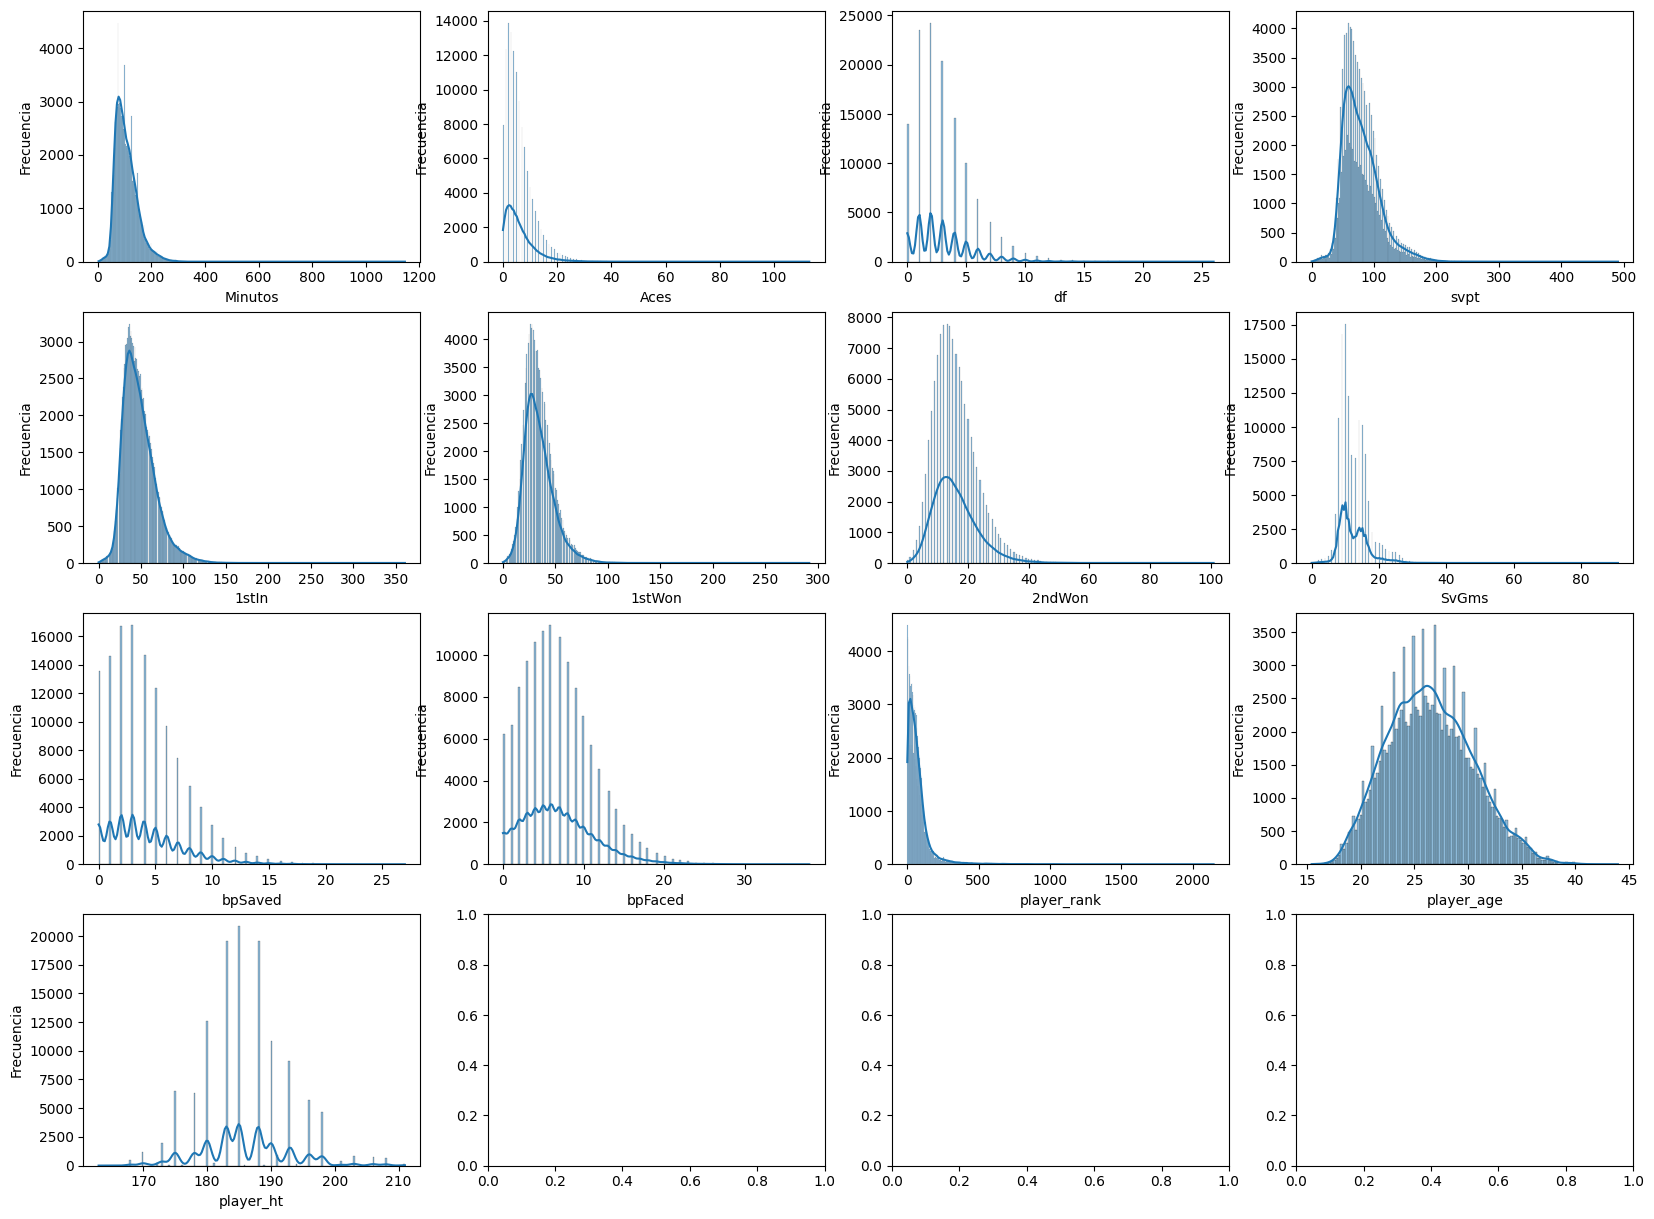

In [10]:
%%time
# Comprobemos la distribución de de los datos de las variables numericas
# Codificando una variable cualitativa dentro de un histograma
fig, ax = plt.subplots(4,4, figsize = (20,15))

sns.histplot(data = matches,
            x = 'minutes',
            kde = True,
            ax = ax[0,0]),
ax[0,0].set_xlabel('Minutos')
ax[0,0].set_ylabel('Frecuencia')

sns.histplot(data = matches,
            x = 'Aces',
            kde = True,
            ax = ax[0,1])
ax[0,1].set_xlabel('Aces')
ax[0,1].set_ylabel('Frecuencia')

sns.histplot(data = matches,
            x = 'df',
            kde = True,
            ax = ax[0,2])
ax[0,2].set_xlabel('df')
ax[0,2].set_ylabel('Frecuencia')

sns.histplot(data = matches,
            x = 'svpt',
            kde = True,
            ax = ax[0,3])
ax[0,3].set_xlabel('svpt')
ax[0,3].set_ylabel('Frecuencia')

sns.histplot(data = matches,
            x = 'FirstIn',
            kde = True,
            ax = ax[1,0]),
ax[1,0].set_xlabel('1stIn')
ax[1,0].set_ylabel('Frecuencia')

sns.histplot(data = matches,
            x = 'FirstWon',
            kde = True,
            ax = ax[1,1])
ax[1,1].set_xlabel('1stWon')
ax[1,1].set_ylabel('Frecuencia')

sns.histplot(data = matches,
            x = 'SecondWon',
            kde = True,
            ax = ax[1,2])
ax[1,2].set_xlabel('2ndWon')
ax[1,2].set_ylabel('Frecuencia')

sns.histplot(data = matches,
            x = 'SvGms',
            kde = True,
            ax = ax[1,3])
ax[1,3].set_xlabel('SvGms')
ax[1,3].set_ylabel('Frecuencia')

sns.histplot(data = matches,
            x = 'bpSaved',
            kde = True,
            ax = ax[2,0])
ax[2,0].set_xlabel('bpSaved')
ax[2,0].set_ylabel('Frecuencia')

sns.histplot(data = matches,
            x = 'bpFaced',
            kde = True,
            ax = ax[2,1])
ax[2,1].set_xlabel('bpFaced')
ax[2,1].set_ylabel('Frecuencia')

sns.histplot(data = matches,
            x = 'player_rank',
            kde = True,
            ax = ax[2,2])
ax[2,2].set_xlabel('player_rank')
ax[2,2].set_ylabel('Frecuencia')


sns.histplot(data = matches,
            x = 'player_age',
            kde = True,
            ax = ax[2,3])
ax[2,3].set_xlabel('player_age')
ax[2,3].set_ylabel('Frecuencia')


sns.histplot(data = matches,
            x = 'player_ht',
            kde = True,
            ax = ax[3,0])
ax[3,0].set_xlabel('player_ht')
ax[3,0].set_ylabel('Frecuencia')

In [11]:
# comprobando la normalidad o no de los datos:
from scipy.stats import shapiro

Numerical = ['minutes','Aces','df','svpt','FirstIn','FirstWon','SecondWon','SvGms','bpSaved','bpFaced','player_rank', 'player_ht','player_age']

for var in Numerical:
 stat, p_value = shapiro(matches[var])
 alpha = 0.05
 if p_value > alpha:
    print(f"La variable {var} presenta un Indicador de Shapiro-Wilk : {stat} y P-value: {p_value}. Los datos se distribuyen de manera Normal (Se acepta H0)")
 else:
    print(f"La variable {var} presenta un Indicador de Shapiro-Wilk :{stat} y P-value: {p_value}. Los datos no se distribuyen de manera Normal (Se rechaza H0)")


La variable minutes presenta un Indicador de Shapiro-Wilk :0.9277400970458984 y P-value: 0.0. Los datos no se distribuyen de manera Normal (Se rechaza H0)
La variable Aces presenta un Indicador de Shapiro-Wilk :0.8487973213195801 y P-value: 0.0. Los datos no se distribuyen de manera Normal (Se rechaza H0)
La variable df presenta un Indicador de Shapiro-Wilk :0.887671172618866 y P-value: 0.0. Los datos no se distribuyen de manera Normal (Se rechaza H0)
La variable svpt presenta un Indicador de Shapiro-Wilk :0.9435259699821472 y P-value: 0.0. Los datos no se distribuyen de manera Normal (Se rechaza H0)
La variable FirstIn presenta un Indicador de Shapiro-Wilk :0.9409338235855103 y P-value: 0.0. Los datos no se distribuyen de manera Normal (Se rechaza H0)
La variable FirstWon presenta un Indicador de Shapiro-Wilk :0.9477168917655945 y P-value: 0.0. Los datos no se distribuyen de manera Normal (Se rechaza H0)
La variable SecondWon presenta un Indicador de Shapiro-Wilk :0.9577422738075256 y

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Ninguna de las variables numericas posee una distribución normal. Por lo tanto procederemos a aplicar la transformacion de **MinMaxScaler**

In [12]:
from sklearn import preprocessing
# Se declara un objeto que contiene la información del escalador
minmax = preprocessing.MinMaxScaler()

matches_minmax =  minmax.fit_transform(matches.loc[:,['minutes','Aces','df','svpt','FirstIn','FirstWon','SecondWon','SvGms','bpSaved','bpFaced','player_rank', 'player_ht','player_age']])
#Creamos una lista con las variables numericas que deseamos transformar

# Se ejecuta el método fit transform sobre los datos
matches_minmax = pd.DataFrame(matches_minmax, columns = ['minutes','Aces','df','svpt','FirstIn','FirstWon','SecondWon','SvGms','bpSaved','bpFaced','player_rank', 'player_ht','player_age'])


Numerical = ['minutes','Aces','df','svpt','FirstIn','FirstWon','SecondWon','SvGms','bpSaved','bpFaced','player_rank', 'player_ht','player_age']
for var in Numerical:
 del matches[var]

matches_minmax.describe()

,minutes,Aces,df,svpt,FirstIn,FirstWon,SecondWon,SvGms,bpSaved,bpFaced,player_rank,player_ht,player_age
count,123708.000000,123708.000000,123708.000000,123708.000000,123708.000000,123708.000000,123708.000000,123708.000000,123708.000000,123708.000000,123708.000000,123708.000000,123708.000000
mean,0.090667,0.053034,0.115232,0.161569,0.133337,0.117339,0.156303,0.136111,0.152270,0.179238,0.034696,0.476670,0.387369
std,0.035831,0.046668,0.093623,0.059375,0.052678,0.048109,0.070566,0.046296,0.120047,0.117403,0.045153,0.141422,0.138023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.064742,0.017699,0.038462,0.118126,0.096953,0.082192,0.108911,0.098901,0.074074,0.078947,0.011189,0.416667,0.286713
50%,0.083990,0.044248,0.115385,0.150713,0.124654,0.109589,0.148515,0.120879,0.148148,0.157895,0.024709,0.458333,0.381119
75%,0.110236,0.070796,0.153846,0.193483,0.160665,0.143836,0.198020,0.164835,0.222222,0.236842,0.042424,0.562500,0.482517
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
matches_minmax = matches_minmax.reset_index(drop=True)
matches = matches.reset_index(drop=True)
matches = pd.concat([matches, matches_minmax],axis= 1)
matches

,match_num,player_id,Results,Event,draw_size,tourney_level,best_of,round,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,player_hand_L,player_hand_R,player_hand_U,player_ioc_ALG,player_ioc_ARG,player_ioc_ARM,player_ioc_AUS,player_ioc_AUT,player_ioc_BAH,player_ioc_BAR,player_ioc_BEL,player_ioc_BIH,player_ioc_BLR,...,player_ioc_SWE,player_ioc_THA,player_ioc_TOG,player_ioc_TPE,player_ioc_TUN,player_ioc_TUR,player_ioc_UKR,player_ioc_URU,player_ioc_USA,player_ioc_UZB,player_ioc_VEN,player_ioc_ZIM,minutes,Aces,df,svpt,FirstIn,FirstWon,SecondWon,SvGms,bpSaved,bpFaced,player_rank,player_ht,player_age
0,300.0,126203.0,Ganador,1,6,5,1,10,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.115486,0.132743,0.076923,0.173116,0.144044,0.154110,0.158416,0.131868,0.000000,0.000000,0.003730,0.625000,0.339161
1,299.0,126207.0,Ganador,1,6,5,1,10,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.027122,0.026549,0.038462,0.054990,0.052632,0.051370,0.029703,0.043956,0.111111,0.078947,0.008392,0.520833,0.332168
2,296.0,126203.0,Ganador,1,6,5,1,9,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.088364,0.097345,0.000000,0.162933,0.138504,0.150685,0.188119,0.131868,0.148148,0.105263,0.003730,0.625000,0.339161
3,295.0,126207.0,Ganador,1,6,5,1,9,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.066492,0.044248,0.153846,0.124236,0.102493,0.106164,0.108911,0.098901,0.185185,0.131579,0.008392,0.520833,0.332168
4,292.0,126774.0,Ganador,1,6,5,1,9,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.132983,0.079646,0.038462,0.199593,0.144044,0.147260,0.277228,0.175824,0.037037,0.052632,0.001399,0.625000,0.311189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123703,26.0,102965.0,Perdedor,0,9,5,1,8,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057743,0.035398,0.115385,0.103870,0.074792,0.068493,0.108911,0.098901,0.185185,0.210526,0.074592,0.312500,0.255245
123704,27.0,102538.0,Perdedor,0,9,5,1,8,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.138233,0.035398,0.230769,0.195519,0.127424,0.106164,0.217822,0.175824,0.111111,0.236842,0.075991,0.458333,0.328671
123705,28.0,102106.0,Perdedor,0,9,5,1,8,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096238,0.123894,0.000000,0.195519,0.163435,0.133562,0.227723,0.164835,0.111111,0.157895,0.055478,0.520833,0.416084
123706,30.0,101611.0,Perdedor,0,9,5,1,9,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113736,0.088496,0.153846,0.213849,0.132964,0.126712,0.326733,0.175824,0.111111,0.131579,0.005594,0.520833,0.527972


#**6. Partición de Entrenamiento y Prueba**#

Vamos a crear un subconjunto de prueba y no de entrenamiento

In [14]:
#Primero dividiremos el conjunto en X - variables predictoras - / y - variable a predecir-
y = matches.iloc[:,3]
X = matches.iloc[:,4:107] # recuerde que en este caso la columna 4 no está siendo incluida

print('Dimensiones de X: {}'.format(X.shape))
print('Dimensiones de y: {}\n'.format(y.shape),)

# Ahora usaremos la función train test split que pertencen al paquete model_selection de sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, #primero pasamos los datos
    test_size = 0.2, # Determinamos la porción de los datos que se usará para probar el modelo, en este caso 30%
    random_state = 7 # Estado aleatorio - Semilla - seed, # reproducibilidad
)
print('Dimensiones de X de entrenamiento: {}'.format(X_train.shape))
print('Dimensiones de y de entrenamiento: {}\n'.format(y_train.shape))

print('Dimensiones de X de prueba: {}'.format(X_test.shape))
print('Dimensiones de y de prueba: {}'.format(y_test.shape))



Dimensiones de X: (123708, 103)
Dimensiones de y: (123708,)

Dimensiones de X de entrenamiento: (98966, 103)
Dimensiones de y de entrenamiento: (98966,)

Dimensiones de X de prueba: (24742, 103)
Dimensiones de y de prueba: (24742,)


#**7. Modelamiento**#



In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn import tree

## K-Vecinos más cercanos

In [16]:
%%time
# Note que importamos el clasificador para resolver un problema de clasificación, cabe destacar que también existe su contraparte de regresión
# Note que importamos el clasificador para resolver un problema de clasificación, cabe destacar que también existe su contraparte de regresión

# Creamos un objeto que va a contener toda la información del modelo, en este caso le pasamos el hiperparametro número de vecinos (n_neighbors)
clf = KNeighborsClassifier(n_neighbors = 11)

# Usando este objeto vamos a hacer el entrenamiento del modelo, para ello usamos el método fit, este se encarga de ajustar el modelo usando los datos de entrenamiento
clf.fit(X_train,y_train)

print('Ya hemos entrenado nuestro primer modelo con el algoritmo de Machine Learning K-Vecinos más Cercanos')
print(type(clf))
clf

ypred_train = clf.predict(X_train)
ypred_test = clf.predict(X_test)

#X_test =np.ascontiguousarray(X_test)
#X_train = np.ascontiguousarray(X_train)
#y_test= np.ascontiguousarray(y_test)
#y_train= np.ascontiguousarray(y_train)

comp = y_test == ypred_test
pd.DataFrame({'Etiqueta_real':y_test,'Etiqueta_predicha': ypred_test, 'Comparación' : comp })

Ya hemos entrenado nuestro primer modelo con el algoritmo de Machine Learning K-Vecinos más Cercanos
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
CPU times: user 3min 30s, sys: 405 ms, total: 3min 30s
Wall time: 2min 5s


,Etiqueta_real,Etiqueta_predicha,Comparación
59831,1,0,False
108877,0,0,True
94365,0,1,False
118403,0,0,True
55435,1,0,False
...,...,...,...
96720,0,1,False
87308,0,1,False
66510,0,0,True
9899,1,0,False


###Evaluación del desempeño del modelo

Para evaluar el desempeño del módelo usaremos la exactitud tanto en la partición de entrenamiento como en la de prueba, recuerde que tomamos decisiones usando las métricas sobre la partición de prueba.

Para evaluar el desempeño vamos a comparar las etiquetas reales contra las etiquetas predichas por el modelo. Hagamos primero nuestra primera predicción usando el método predict sobre el objeto clf.

In [17]:
acc_knn = accuracy_score(y_test, ypred_test)
print('Exactitud en partición de prueba: {:3f}'.format(acc_knn),'\n' )
#X_train =np.ascontiguousarray(X_train)

acc_knn2 = accuracy_score(y_train, ypred_train)
print('Exactitud en partición de entrenamiento: {:3f}'.format(acc_knn2), '\n')

print(confusion_matrix(y_test, ypred_test), '\n')
print(classification_report(y_test, ypred_test),'\n' )

Exactitud en partición de prueba: 0.641217 

Exactitud en partición de entrenamiento: 0.725825 

[[7689 4615]
 [4262 8176]] 

              precision    recall  f1-score   support

           0       0.64      0.62      0.63     12304
           1       0.64      0.66      0.65     12438

    accuracy                           0.64     24742
   macro avg       0.64      0.64      0.64     24742
weighted avg       0.64      0.64      0.64     24742
 



###**Búsqueda de hiperparametros óptimos**###



CPU times: user 7min 44s, sys: 1.42 s, total: 7min 45s
Wall time: 4min 33s


Text(0, 0.5, 'Error cuadrático medio')

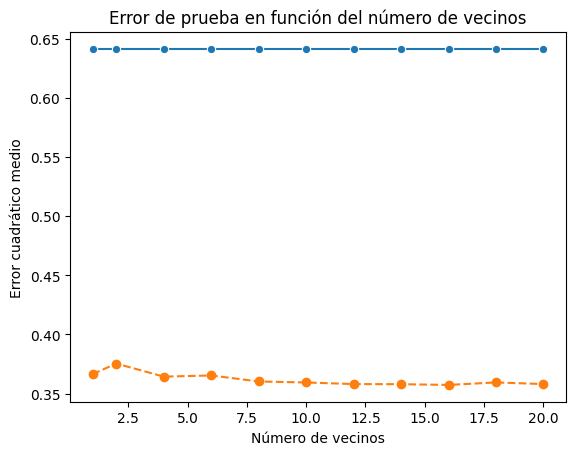

In [38]:
%%time
k_values = [1,2,4,6,8,10,12,14,16,18,20]
exactitud_prueba = []
mse_knn=[]

from sklearn.metrics  import mean_squared_error
from sklearn.metrics import r2_score

for i in k_values:
 clf = KNeighborsClassifier(n_neighbors = i)
 clf.fit(X_train,y_train)
 y_pred_test = clf.predict(X_test)
 metrica = accuracy_score(y_test,ypred_test)
 exactitud_prueba.append(metrica)
 error =mean_squared_error(y_test, y_pred_test)
 mse_knn.append(error)

sns.lineplot(x = k_values, y = metrica, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")


Text(0, 0.5, 'Error cuadrático medio')

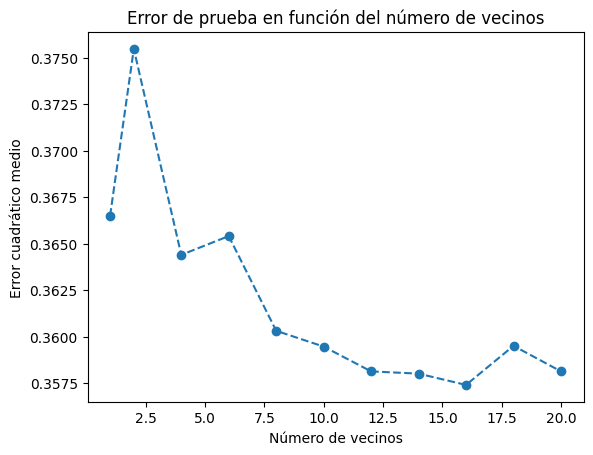

In [39]:
plt.plot(k_values, mse_knn,'o',linestyle='dashed')
plt.title('Error de prueba en función del número de vecinos')
plt.xlabel('Número de vecinos')
plt.ylabel('Error cuadrático medio')

### Modelo Final Vecinos mas Cercanos###

In [40]:
%%time
clf = KNeighborsClassifier(n_neighbors = 16)

clf.fit(X_train,y_train)

ypred_train = clf.predict(X_train)
ypred_test = clf.predict(X_test)

comp = y_test == ypred_test
pd.DataFrame({'Etiqueta_real':y_test,'Etiqueta_predicha': ypred_test, 'Comparación' : comp })

acc_knn = accuracy_score(y_test, ypred_test)
print('Exactitud en partición de prueba: {:3f}'.format(acc_knn),'\n' )

acc_knn2 = accuracy_score(y_train, ypred_train)
print('Exactitud en partición de entrenamiento: {:3f}'.format(acc_knn2), '\n')

print(confusion_matrix(y_test, ypred_test), '\n')
print(classification_report(y_test, ypred_test),'\n' )

Exactitud en partición de prueba: 0.642592 

Exactitud en partición de entrenamiento: 0.708011 

[[8451 3853]
 [4990 7448]] 

              precision    recall  f1-score   support

           0       0.63      0.69      0.66     12304
           1       0.66      0.60      0.63     12438

    accuracy                           0.64     24742
   macro avg       0.64      0.64      0.64     24742
weighted avg       0.64      0.64      0.64     24742
 



#Arboles de Decisión

In [41]:
from graphviz import Source
from sklearn.tree import export_graphviz

# Note que importamos el clasificador para resolver un problema de clasificación, cabe destacar que también existe su contraparte de regresión

# Creamos un objeto que va a contener toda la información del modelo
tree = DecisionTreeClassifier(max_depth= 10, # Define la profundidad máxima del árbol, cuando igual a None no se limita el crecimiento del arbol
                              random_state= 45, # Define la semilla para las variables aleatorias requeridas dentro del algoritmo
                               max_leaf_nodes = 3# Define el criterio usado para medir la calidad de cada
                              )

# Usando este objeto vamos a hacer el entrenamiento del modelo, para ello usamos el método fit, este se encarga de ajustar el modelo usando los datos de entrenamiento
tree.fit(X_train,y_train)

print('¡Ya hemos creado nuestro primer modelo usando el algoritmo de Machine Learning árbol de decisión!')
print(type(clf))

¡Ya hemos creado nuestro primer modelo usando el algoritmo de Machine Learning árbol de decisión!
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>


###Evaluación del desempeño del modelo

Para evaluar el desempeño del módelo usaremos la exactitud tanto en la partición de entrenamiento como en la de prueba, recuerde que tomamos decisiones usando las métricas sobre la partición de prueba.

Para evaluar el desempeño vamos a comparar las etiquetas reales contra las etiquetas predichas por el modelo. Hagamos primero nuestra primera predicción usando el método predict sobre el objeto clf.

In [42]:
from sklearn.metrics import accuracy_score

ypred_tree_test = tree.predict(X_test)
acc_tree_test = accuracy_score(y_test, ypred_tree_test)
print('Exactitud en partición de prueba: {:3f}'.format(acc_tree_test),'\n')

ypred_tree_train = tree.predict(X_train)
acc_tree_train = accuracy_score(y_train, ypred_tree_train)
print('Exactitud en partición de entrenamiento: {:3f}'.format(acc_tree_train),'\n')

print(confusion_matrix(y_test, ypred_test), '\n')
print(classification_report(y_test, ypred_tree_test),'\n' )


Exactitud en partición de prueba: 0.689314 

Exactitud en partición de entrenamiento: 0.691672 

[[8451 3853]
 [4990 7448]] 

              precision    recall  f1-score   support

           0       0.64      0.85      0.73     12304
           1       0.78      0.53      0.63     12438

    accuracy                           0.69     24742
   macro avg       0.71      0.69      0.68     24742
weighted avg       0.71      0.69      0.68     24742
 



In [22]:
print(tree.get_n_leaves, '\n')
print(tree.get_params(), '\n') # Retorna los hiperparámetros usados para entrenar el modelo

print(tree.get_depth(), '\n') # Retorna la profundidad del árbol

<bound method BaseDecisionTree.get_n_leaves of DecisionTreeClassifier(max_depth=10, max_leaf_nodes=3, random_state=45)> 

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': 3, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 45, 'splitter': 'best'} 

2 



In [45]:
tree.feature_importances_ # Retorna la importancia de las variable predictoras en la predicción de la etiqueta Species

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [44]:
tree.feature_names_in_

array(['draw_size', 'tourney_level', 'best_of', 'round', 'surface_Carpet',
       'surface_Clay', 'surface_Grass', 'surface_Hard', 'player_hand_L',
       'player_hand_R', 'player_hand_U', 'player_ioc_ALG',
       'player_ioc_ARG', 'player_ioc_ARM', 'player_ioc_AUS',
       'player_ioc_AUT', 'player_ioc_BAH', 'player_ioc_BAR',
       'player_ioc_BEL', 'player_ioc_BIH', 'player_ioc_BLR',
       'player_ioc_BOL', 'player_ioc_BRA', 'player_ioc_BUL',
       'player_ioc_CAN', 'player_ioc_CHI', 'player_ioc_CHN',
       'player_ioc_COL', 'player_ioc_CRC', 'player_ioc_CRO',
       'player_ioc_CYP', 'player_ioc_CZE', 'player_ioc_DEN',
       'player_ioc_DOM', 'player_ioc_ECU', 'player_ioc_EGY',
       'player_ioc_ESA', 'player_ioc_ESP', 'player_ioc_EST',
       'player_ioc_FIN', 'player_ioc_FRA', 'player_ioc_GBR',
       'player_ioc_GEO', 'player_ioc_GER', 'player_ioc_GRE',
       'player_ioc_GUA', 'player_ioc_HUN', 'player_ioc_INA',
       'player_ioc_IND', 'player_ioc_IRL', 'player_ioc_ISR',


In [43]:
tree.classes_

array([0, 1])

In [46]:
tree.max_features

In [47]:
y_pred = tree.predict(X_test)

Error =mean_squared_error(y_test, y_pred)
print('El error cuadrático medio es: {}'.format(error), '\n')

r2_test = r2_score(y_test, y_pred)
print('El Coeficiente de Determinacion es :{}'.format(r2_test),'\n')


El error cuadrático medio es: 0.35813596313960067 

El Coeficiente de Determinacion es :-0.24278158286688467 



Text(0, 0.5, 'Importancia relativa')

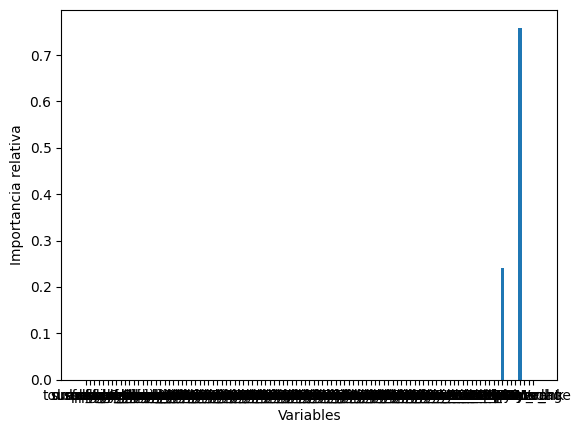

In [27]:
plt.bar(x= tree.feature_names_in_ ,height = tree.feature_importances_)
plt.xlabel('Variables')
plt.ylabel('Importancia relativa')

###**Búsqueda de hiperparametros óptimos**###



In [28]:
print(tree.feature_names_in_, '\n')
print(tree.feature_importances_,'\n')

['draw_size' 'tourney_level' 'best_of' 'round' 'surface_Carpet'
 'surface_Clay' 'surface_Grass' 'surface_Hard' 'player_hand_L'
 'player_hand_R' 'player_hand_U' 'player_ioc_ALG' 'player_ioc_ARG'
 'player_ioc_ARM' 'player_ioc_AUS' 'player_ioc_AUT' 'player_ioc_BAH'
 'player_ioc_BAR' 'player_ioc_BEL' 'player_ioc_BIH' 'player_ioc_BLR'
 'player_ioc_BOL' 'player_ioc_BRA' 'player_ioc_BUL' 'player_ioc_CAN'
 'player_ioc_CHI' 'player_ioc_CHN' 'player_ioc_COL' 'player_ioc_CRC'
 'player_ioc_CRO' 'player_ioc_CYP' 'player_ioc_CZE' 'player_ioc_DEN'
 'player_ioc_DOM' 'player_ioc_ECU' 'player_ioc_EGY' 'player_ioc_ESA'
 'player_ioc_ESP' 'player_ioc_EST' 'player_ioc_FIN' 'player_ioc_FRA'
 'player_ioc_GBR' 'player_ioc_GEO' 'player_ioc_GER' 'player_ioc_GRE'
 'player_ioc_GUA' 'player_ioc_HUN' 'player_ioc_INA' 'player_ioc_IND'
 'player_ioc_IRL' 'player_ioc_ISR' 'player_ioc_ITA' 'player_ioc_JPN'
 'player_ioc_KAZ' 'player_ioc_KOR' 'player_ioc_LAT' 'player_ioc_LTU'
 'player_ioc_LUX' 'player_ioc_MAR' 'player_ioc_

In [48]:
%%time
#profundidad = [1,2,4,6,8,10,12,14,16,18,20]

profundidad = range(1,10)
exactitud_prueba = []
exactitud_entrenamiento = []

for i in profundidad:
  tree = DecisionTreeClassifier(random_state = 0, max_depth = i)
  tree.fit(X_train,y_train)

  y_pred = tree.predict(X_test)
  y_pred2 = tree.predict(X_train)

  metrica = accuracy_score(y_test,y_pred)
  metrica2 = accuracy_score(y_train,y_pred2)

  exactitud_prueba.append(metrica)
  exactitud_entrenamiento.append(metrica2)

print(profundidad)
print(exactitud_prueba)
print(exactitud_entrenamiento)

range(1, 10)
[0.6893137175652736, 0.6893137175652736, 0.7252041063778191, 0.7458976638913588, 0.7514752243149301, 0.7643682806563737, 0.7714816910516531, 0.779403443537305, 0.7853043407970253]
[0.6916718873148354, 0.6916718873148354, 0.728714912192066, 0.7469231857405574, 0.7546632176707152, 0.7672635046379565, 0.7770042236727766, 0.7889376149384637, 0.7979103934684639]
CPU times: user 7.8 s, sys: 627 ms, total: 8.43 s
Wall time: 8.48 s


Text(0, 0.5, 'Error cuadrático medio')

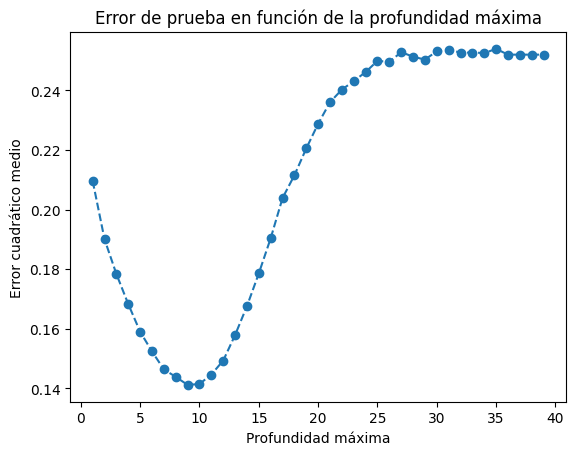

In [49]:
%%time
mse_tree = []
valores_profundidad = range(1,40,1)

tree = DecisionTreeRegressor(random_state= 5)
tree.fit(X_train,y_train)

for i in valores_profundidad:
  tree =DecisionTreeRegressor(random_state= 5, max_depth= i)
  tree.fit(X_train,y_train)
  y_pred =tree.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mse_tree.append(mse)

plt.plot(valores_profundidad, mse_tree,'o',linestyle='dashed')
plt.title('Error de prueba en función de la profundidad máxima')
plt.xlabel('Profundidad máxima')
plt.ylabel('Error cuadrático medio')

### Modelo Final Arboles de Decision###

In [50]:
%%time
tree = DecisionTreeClassifier(max_depth= 9,
                              random_state= 45,
                               max_leaf_nodes = 3
                              )

# Usando este objeto vamos a hacer el entrenamiento del modelo, para ello usamos el método fit, este se encarga de ajustar el modelo usando los datos de entrenamiento
tree.fit(X_train,y_train)
y_tree_predict = tree.predict(X_test)

acc_tree_test = accuracy_score(y_test, ypred_tree_test)
print('Exactitud en partición de prueba: {:3f}'.format(acc_tree_test),'\n')

ypred_tree_train = tree.predict(X_train)
acc_tree_train = accuracy_score(y_train, ypred_tree_train)
print('Exactitud en partición de entrenamiento: {:3f}'.format(acc_tree_train),'\n')

print(confusion_matrix(y_test, ypred_test), '\n')
print(classification_report(y_test, ypred_tree_test),'\n' )



Exactitud en partición de prueba: 0.689314 

Exactitud en partición de entrenamiento: 0.691672 

[[8451 3853]
 [4990 7448]] 

              precision    recall  f1-score   support

           0       0.64      0.85      0.73     12304
           1       0.78      0.53      0.63     12438

    accuracy                           0.69     24742
   macro avg       0.71      0.69      0.68     24742
weighted avg       0.71      0.69      0.68     24742
 

CPU times: user 744 ms, sys: 97.7 ms, total: 841 ms
Wall time: 882 ms


#Random Forest

In [30]:
%%time
# Importacion de Librerias
import pandas as pd
import numpy as np

# Librerias para modelar
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Librerias para Graficar
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

CPU times: user 26.6 ms, sys: 5.97 ms, total: 32.6 ms
Wall time: 80.3 ms


In [31]:
%%time
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

CPU times: user 29 s, sys: 664 ms, total: 29.7 s
Wall time: 29.7 s


RandomForestClassifier()

###Evaluación del desempeño del modelo

Para evaluar el desempeño del módelo usaremos la exactitud tanto en la partición de entrenamiento como en la de prueba, recuerde que tomamos decisiones usando las métricas sobre la partición de prueba.

Para evaluar el desempeño vamos a comparar las etiquetas reales contra las etiquetas predichas por el modelo. Hagamos primero nuestra primera predicción usando el método predict sobre el objeto clf.

In [32]:
from sklearn.metrics import accuracy_score

ypred_rf_test = rf.predict(X_test)
acc_rf_test = accuracy_score(y_test, ypred_rf_test)
print('Exactitud en partición de prueba: {:3f}'.format(acc_rf_test),'\n')

ypred_rf_train = rf.predict(X_train)
acc_rf_train = accuracy_score(y_train, ypred_rf_train)
print('Exactitud en partición de entrenamiento: {:3f}'.format(acc_rf_train),'\n')

print(confusion_matrix(y_test, ypred_rf_test), '\n')
print(classification_report(y_test, ypred_rf_test),'\n' )

Exactitud en partición de prueba: 0.787649 

Exactitud en partición de entrenamiento: 1.000000 

[[9749 2555]
 [2699 9739]] 

              precision    recall  f1-score   support

           0       0.78      0.79      0.79     12304
           1       0.79      0.78      0.79     12438

    accuracy                           0.79     24742
   macro avg       0.79      0.79      0.79     24742
weighted avg       0.79      0.79      0.79     24742
 



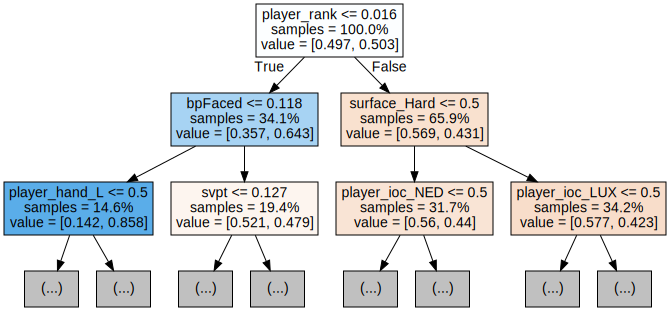

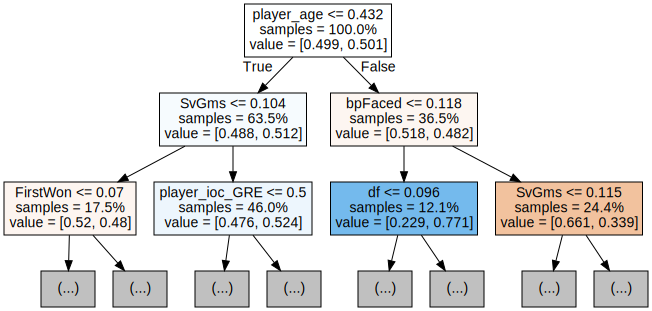

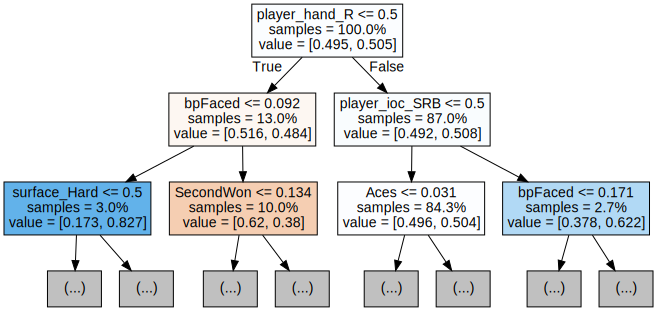

In [33]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

###**Búsqueda de hiperparametros óptimos**###


El siguiente código utiliza el de **Scikit-Learn** , que buscará aleatoriamente parámetros dentro de un rango por hiperparámetro. Definimos los hiperparámetros a utilizar y sus rangos en el diccionario param_dist. En nuestro caso, estamos utilizando:**RandomizedSearchCV**

**n_estimators**: el número de árboles de decisión en el bosque. El aumento de este hiperparámetro generalmente mejora el rendimiento del modelo, pero también aumenta el costo computacional de entrenamiento y predicción.

**max_depth**: la profundidad máxima de cada árbol de decisión en el bosque. Establecer un valor más alto para max_depth puede conducir a un sobreajuste, mientras que ajustarlo demasiado bajo puede conducir a un ajuste insuficiente.
fuente:

**https://www.datacamp.com/tutorial/random-forests-classifier-python**


In [34]:

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a11d1362860>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a11d14e38b0>})

In [35]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 16, 'n_estimators': 415}


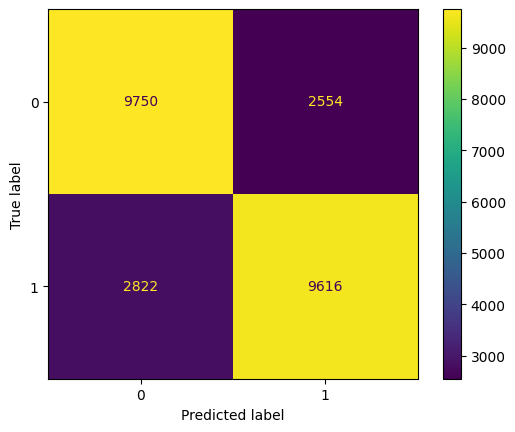

In [36]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

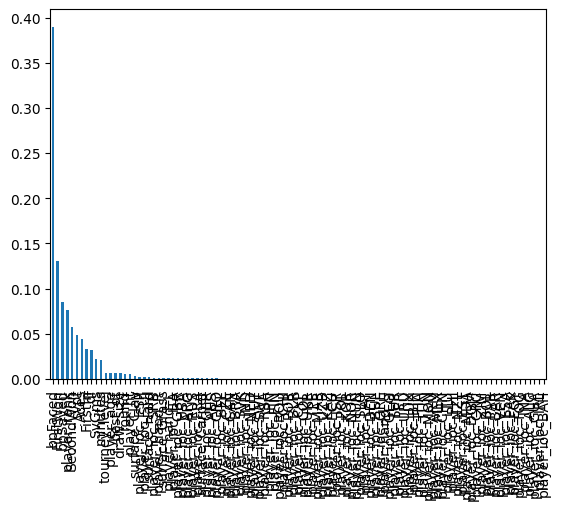

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();